In [44]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler, QuantileTransformer
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
sns.set()



In [45]:
#load data
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [46]:
#changing df column names
df.rename({'DEATH_EVENT': 'death_event'}, inplace=True, axis = 1)
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [71]:
#split data
X = df.drop('death_event', axis = 1)
y = df['death_event']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
#dataset balance
y_train.value_counts()

death_event
0    168
1     71
Name: count, dtype: int64

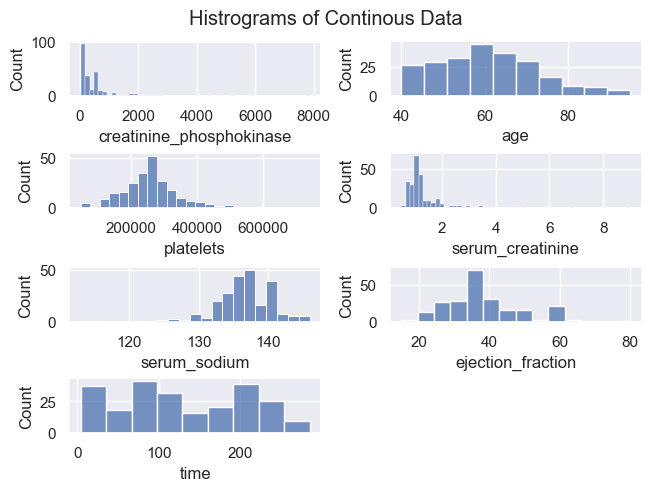

<Figure size 960x720 with 0 Axes>

In [73]:
#investigating continous data
continous_cols = df[["creatinine_phosphokinase","age","platelets","serum_creatinine", "serum_sodium", "ejection_fraction","time"]]

fig, ax = plt.subplots(4,2, layout = 'constrained')
fig.delaxes(ax[3,1])

ax = ax.ravel()

plt.figure(dpi = 150)
fig.suptitle("Histrograms of Continous Data")
for count, chart in enumerate(continous_cols):
        sns.histplot(x_train[chart], ax = ax[count])

In [51]:
#using different scalers
quantile_transformer = QuantileTransformer(n_quantiles = 50)
min_max = MinMaxScaler()
standard = StandardScaler()

quantile_cols = df[["creatinine_phosphokinase","age","platelets","serum_creatinine", "serum_sodium"]]
min_max_cols = df[["ejection_fraction","time"]]

for col in quantile_cols:
        x_train[col] = quantile_transformer.fit_transform(x_train[col].values.reshape(-1,1))

for col in min_max_cols:
        x_train[col] = min_max.fit_transform(x_train[col].values.reshape(-1,1))   

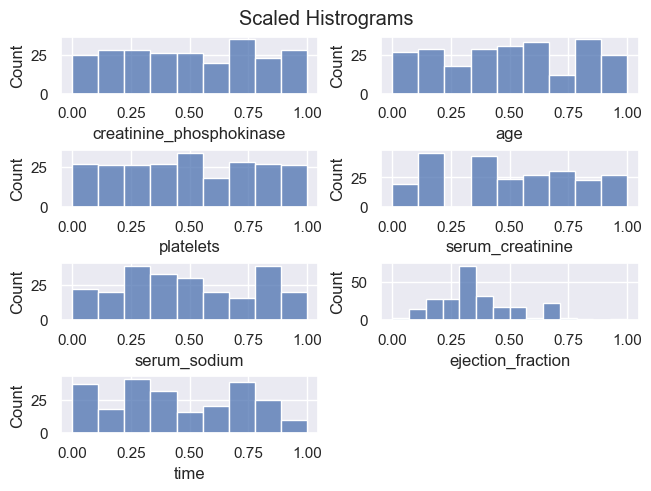

In [52]:
fig, ax = plt.subplots(4,2, layout = 'constrained')
fig.suptitle('Scaled histrograms')
fig.delaxes(ax[3,1])

ax = ax.ravel()

for count, chart in enumerate(continous_cols):
        sns.histplot(x_train[chart], ax = ax[count])

In [53]:
#applying same transfomations to testing data
for col in quantile_cols:
        x_test[col] = quantile_transformer.fit_transform(x_test[col].values.reshape(-1,1))

for col in min_max_cols:
        x_test[col] = min_max.fit_transform(x_test[col].values.reshape(-1,1))

In [54]:
#import pytorch modules
import torch
import torch.nn as nn

In [55]:
#turning our data into tensors
key_list = ["x_train", "x_test", "y_train", "y_test"]
tensor_dict = {key: None for key in key_list}

for i in tensor_dict:
         tensor_dict[i] = torch.tensor(eval(i).values).type(torch.float) 

In [56]:
#neural network
class HeartFailureLinearNN(nn.Module):
    
    def __init__(self, ins, outs, hidden_nodes):
        super().__init__()

        self.stacked_network = nn.Sequential(
            nn.Linear(in_features = ins, out_features = hidden_nodes),
            nn.Linear(in_features = hidden_nodes, out_features = hidden_nodes),
            nn.Linear(in_features = hidden_nodes, out_features = outs)
        )

    def forward(self, x):
        return self.stacked_network(x) 

In [57]:
#building model
input = 12
hidden = 16
output = 1

linear_nn = HeartFailureLinearNN(ins = input, hidden_nodes = hidden,
                                 outs = output) 

In [58]:
#loss and optimiser
loss_fn = nn.BCEWithLogitsLoss()
optimiser = torch.optim.SGD(linear_nn.parameters(),lr=0.1)

In [59]:
#training and testing
torch.manual_seed(42)
epochs = 500

#array to track loss
epoch_loss_train = []
epoch_loss_test = []

for epoch in range(epochs):

        #forward pass
        y_logits = linear_nn(tensor_dict["x_train"]).squeeze()

        #loss
        loss = loss_fn(y_logits, tensor_dict["y_train"])
        

        #back prop
        loss.backward()

        #optimiser
        optimiser.step()
        optimiser.zero_grad()

        #testing
        linear_nn.eval()

        #storing loss val
        epoch_loss_train.append(loss.detach().numpy())
        
        with torch.inference_mode():
                test_logits = linear_nn(tensor_dict["x_test"])
                test_preds  = torch.round(torch.sigmoid(test_logits)).squeeze()
                #loss
                test_loss = loss_fn(test_preds, tensor_dict["y_test"])
                epoch_loss_test.append(test_loss.detach().numpy())
                acc = balanced_accuracy_score(tensor_dict["y_test"], test_preds)

        if epoch % 100 == 0:
                print(f"Epoch: {epoch} Training loss: {loss:.5f} | Test Loss: {test_loss:.5f} | Test accuracy: {acc:.3f}")


print(classification_report(y_test,test_preds))

Epoch: 0 Training loss: 0.73818 | Test Loss: 0.89660 | Test accuracy: 0.500
Epoch: 100 Training loss: 0.48299 | Test Loss: 0.66782 | Test accuracy: 0.580
Epoch: 200 Training loss: 0.34618 | Test Loss: 0.64017 | Test accuracy: 0.686
Epoch: 300 Training loss: 0.32667 | Test Loss: 0.63384 | Test accuracy: 0.706
Epoch: 400 Training loss: 0.32409 | Test Loss: 0.63384 | Test accuracy: 0.706
              precision    recall  f1-score   support

           0       0.71      0.97      0.82        35
           1       0.92      0.44      0.59        25

    accuracy                           0.75        60
   macro avg       0.81      0.71      0.71        60
weighted avg       0.80      0.75      0.73        60



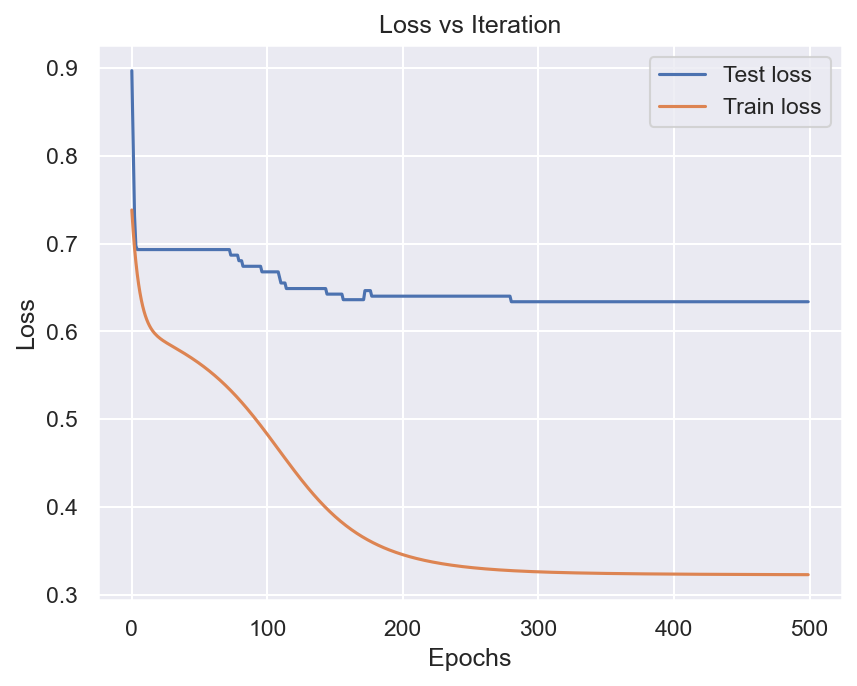

In [60]:
#loss vs epochs
plt.figure(dpi=150)
plt.title("Loss vs Iteration")
plt.plot(range(epochs), epoch_loss_test, label = "Test loss")
plt.plot(range(epochs), epoch_loss_train, label = "Train loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

<Axes: >

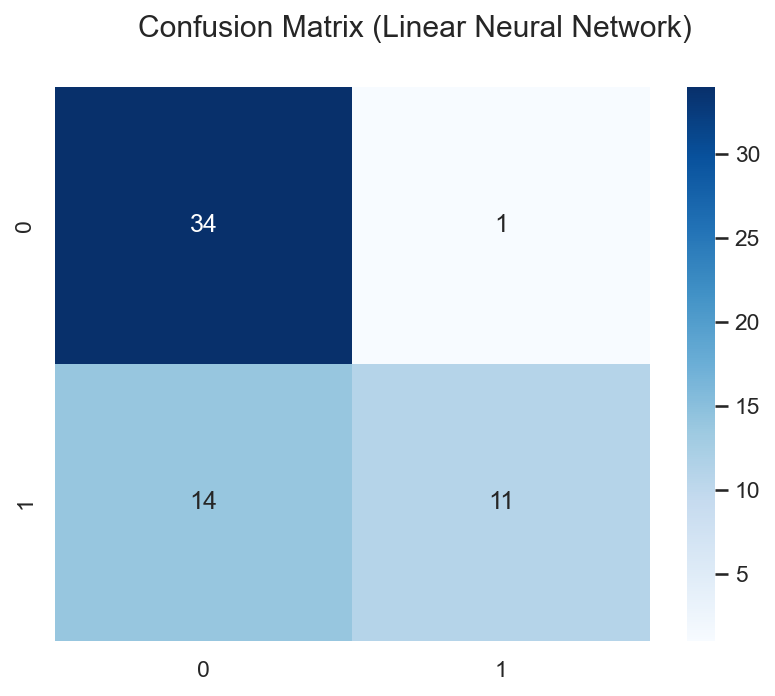

In [61]:
#confusion matrix linear model
cfm = confusion_matrix(y_test,test_preds)

plt.figure(dpi=150)
plt.suptitle('Confusion Matrix (Linear Neural Network)')                       
sns.heatmap(cfm, annot = True, cmap = 'Blues')


In [62]:
#building non-linear neural network
class HeartFailureNonLinearNN(nn.Module):
    
    def __init__(self, ins, outs, hidden_nodes = 8):
        super().__init__()

        self.stacked_network = nn.Sequential(
            nn.Linear(in_features = ins, out_features = hidden_nodes),
            nn.ReLU(),
            nn.Linear(in_features = hidden_nodes, out_features = hidden_nodes),
            nn.ReLU(),
            nn.Linear(in_features = hidden_nodes, out_features = outs),
        )

    def forward(self, x):
        return self.stacked_network(x)  

In [63]:
#building model
input = 12
output = 1

nonlinear_nn = HeartFailureNonLinearNN(ins = input, outs = output) 
                                 
optimiser_nl = torch.optim.SGD(nonlinear_nn.parameters(),lr=0.1)

In [64]:
#training and testing
torch.manual_seed(42)
epochs = 500

for epoch in range(epochs):

        #forward pass
        y_logits = nonlinear_nn(tensor_dict["x_train"]).squeeze()

        #loss
        loss = loss_fn(y_logits, tensor_dict["y_train"])

        #back prop
        loss.backward()

        #optimiser
        optimiser_nl.step()
        optimiser_nl.zero_grad()

        #testing
        nonlinear_nn.eval()

        with torch.inference_mode():
                test_logits = nonlinear_nn(tensor_dict["x_test"])
                test_preds  = torch.round(torch.sigmoid(test_logits)).squeeze()
                #loss
                test_loss = loss_fn(test_preds, tensor_dict["y_test"])
                acc = balanced_accuracy_score(tensor_dict["y_test"], test_preds)

        if epoch % 100 == 0:
                print(f"Epoch: {epoch} Training loss: {loss:.5f} | Test Loss: {test_loss:.5f} | Test balanced accuracy: {acc:.3f}")

print(classification_report(y_test,test_preds))               

Epoch: 0 Training loss: 0.71614 | Test Loss: 0.89660 | Test balanced accuracy: 0.500
Epoch: 100 Training loss: 0.58971 | Test Loss: 0.69315 | Test balanced accuracy: 0.500
Epoch: 200 Training loss: 0.48094 | Test Loss: 0.68048 | Test balanced accuracy: 0.540
Epoch: 300 Training loss: 0.36277 | Test Loss: 0.64017 | Test balanced accuracy: 0.686
Epoch: 400 Training loss: 0.32724 | Test Loss: 0.64017 | Test balanced accuracy: 0.686
              precision    recall  f1-score   support

           0       0.71      0.97      0.82        35
           1       0.92      0.44      0.59        25

    accuracy                           0.75        60
   macro avg       0.81      0.71      0.71        60
weighted avg       0.80      0.75      0.73        60



In [65]:
#logistic model
log_reg = LogisticRegression()

#train
log_reg.fit(x_train,y_train)

#predict
y_pred = log_reg.predict(x_test)

#accuracy
print(f"Logistic model balance accuracy: {balanced_accuracy_score(y_pred, y_test):.3f}")
print(classification_report(y_test, y_pred))

Logistic model balance accuracy: 0.801
              precision    recall  f1-score   support

           0       0.69      0.97      0.81        35
           1       0.91      0.40      0.56        25

    accuracy                           0.73        60
   macro avg       0.80      0.69      0.68        60
weighted avg       0.78      0.73      0.70        60



<Axes: >

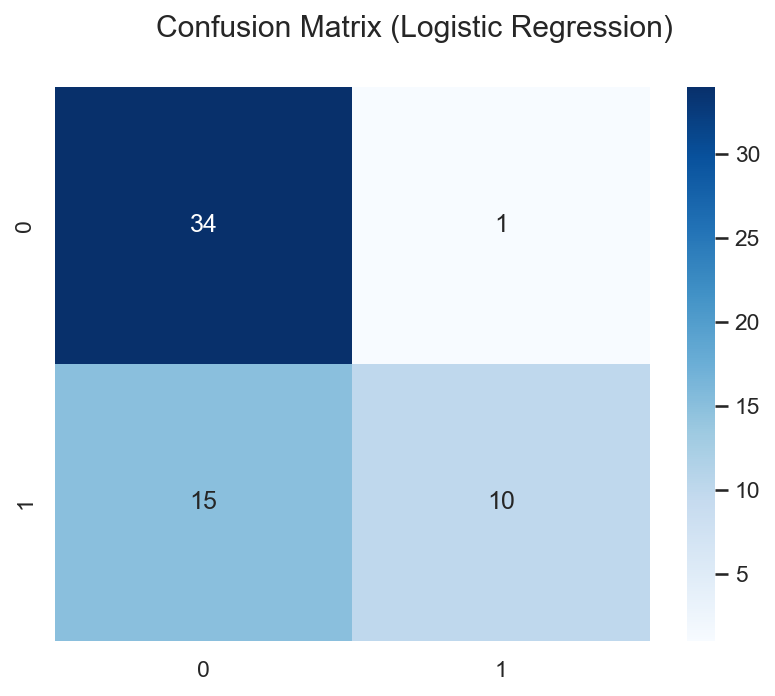

In [66]:
#confusion matrix logistic regression
cfm = confusion_matrix(y_test, y_pred)

plt.figure(dpi=150)
plt.suptitle('Confusion Matrix (Logistic Regression)')                       
sns.heatmap(cfm, annot = True, cmap = 'Blues')